In [1]:
!pip install -i https://test.pypi.org/simple/ all-in-one-ml==0.0.3

Looking in indexes: https://test.pypi.org/simple/
  Created wheel for all-in-one-ml: filename=all_in_one_ml-0.0.3-cp36-none-any.whl size=3868 sha256=0b03fb76fa8ff27613f1897395ffd49ff4d4d1d905c15648c4901ca2219036f7
  Stored in directory: /root/.cache/pip/wheels/26/4f/f4/d595e3f4e73e8a49c62b9e2e99856618444f8d4c938d9c1b28
Successfully built all-in-one-ml


In [2]:
from all_in_one_ml import beginner
from sklearn import datasets
import pandas as pd

In [3]:
data = datasets.fetch_openml('kr-vs-kp')

In [4]:
df = pd.DataFrame(data.data,columns = data.feature_names)
df['class'] = data.target

In [5]:
df.head()

bkblk  bknwy  bkon8  bkona  bkspr  ...  wknck  wkovl  wkpos  wtoeg  class
0    1.0    1.0    1.0    1.0    1.0  ...    1.0    0.0    0.0    0.0    won
1    1.0    1.0    1.0    1.0    0.0  ...    1.0    0.0    0.0    0.0    won
2    1.0    1.0    1.0    1.0    0.0  ...    1.0    0.0    0.0    0.0    won
3    1.0    1.0    1.0    1.0    1.0  ...    1.0    0.0    0.0    0.0    won
4    1.0    1.0    1.0    1.0    1.0  ...    1.0    0.0    0.0    0.0    won

[5 rows x 37 columns]

In [6]:
x = df.drop(columns=['class'])
y = df['class']

In [7]:
x_hot,y_hot = beginner.one_hot(x,y,cat='~')
print(x_hot,y_hot)

      bkblk_0.0  bkblk_1.0  bknwy_0.0  ...  wkpos_1.0  wtoeg_0.0  wtoeg_1.0
0             0          1          0  ...          0          1          0
1             0          1          0  ...          0          1          0
2             0          1          0  ...          0          1          0
3             0          1          0  ...          0          1          0
4             0          1          0  ...          0          1          0
...         ...        ...        ...  ...        ...        ...        ...
3191          1          0          0  ...          1          1          0
3192          1          0          0  ...          1          1          0
3193          1          0          0  ...          1          1          0
3194          1          0          0  ...          1          1          0
3195          1          0          0  ...          1          1          0

[3196 rows x 73 columns]       nowin  won
0         0    1
1         0    1
2         0

In [8]:
x_train,x_test,y_train,y_test = beginner.split_dataset(x_hot,y_hot,0.2,8)

(2556, 73) (2556, 2) (640, 73) (640, 2)


In [9]:
x_train.head()

bkblk_0.0  bkblk_1.0  bknwy_0.0  ...  wkpos_1.0  wtoeg_0.0  wtoeg_1.0
1897          0          1          0  ...          0          1          0
37            0          1          0  ...          1          1          0
2511          1          0          0  ...          1          1          0
940           0          1          0  ...          1          1          0
2638          0          1          0  ...          1          1          0

[5 rows x 73 columns]

In [10]:
y_train.head()

nowin  won
1897      0    1
37        0    1
2511      1    0
940       1    0
2638      1    0

In [11]:
model,history = beginner.build_compile_fit_model(x_train,y_train,'classification',30,3,[100,100,100],['relu','relu','relu'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               7400      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
Total params: 27,802
Trainable params: 27,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
64/64 [==============================] - 0s 5ms/step - loss: 0.4257 - accuracy: 0.8019 - val_loss: 0.1957 - val_accuracy: 0.9453
Epoch 2/30
64/64 [==============================] - 0s 2ms/step - loss: 0.1438 - accuracy: 0.9486 - val_loss: 

In [12]:
beginner.get_accuracy(x_test,y_test,model)

20/20 [==============================] - 0s 1ms/step - loss: 0.0094 - accuracy: 0.9953


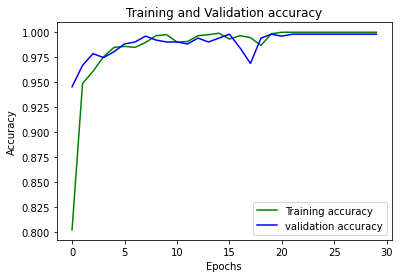

In [13]:
beginner.accuracy_vs_valaccuracy(model,history,30)

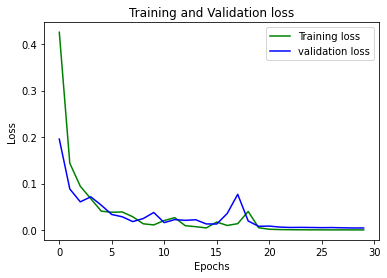

In [14]:
beginner.loss_vs_valloss(model,history,30)